In [1]:
import numpy as np
from scipy.fft import  rfft2, irfft2,fft2,ifft2 , fftshift , ifftshift
from scipy.fftpack import ifftshift

import cv2
import pylab
from matplotlib import pyplot as plt

# Functions

In [21]:
class Image:
    
    def __init__(self, image_path, width,height):
        self.image_path = image_path
        self.width = width
        self.height = height
#         self.fftmag = 1
#         selg.fftangle = 1
        self.image =cv2.imread(self.image_path,0)
        if (self.image.shape[0] != self.width) & (self.image.shape[1] != self.height) :
            self.image = cv2.resize(self.image, (self.width,self.height))
    
    def calculate_img_magnitude_phase(self):
        fftdata = fft2(self.image)
        fftdata = fftshift(fftdata)
        self.fftmag = np.abs(fftdata)
        self.fftangle = np.angle(fftdata)
    #     fftphase = np.exp(np.multiply(1j,fftangle))
#         return self.fftmag , self.fftangle

    def save_3_images(self,name):
        img_mag = ifftshift(np.multiply(self.fftmag,1))
        img_mag = ifft2(img_mag)
        img_phase = ifftshift(1 * np.exp(np.multiply(1j,self.fftangle)))
        img_phase = ifft2(img_phase)
        plt.imsave(f"{name}.png",self.image, cmap='gray')
        plt.imsave(f"{name}_mag.png",img_mag.real, cmap='gray')
        plt.imsave(f"{name}_phase.png",img_phase.real, cmap='gray')
#         plt.imsave(f"data\generated_images\\{name}.png",self.image, cmap='gray')
#         plt.imsave(f"data\generated_images\\{name}_mag.png",img_mag.real, cmap='gray')
#         plt.imsave(f"data\generated_images\\{name}_phase.png",img_phase.real, cmap='gray')
        

In [46]:
class Processing :
    
    @staticmethod
    def crop_2d_img(image,**dimenions) :
        max_height= image.shape[0]-1

        x1 = dimenions["x"] *  image.shape[0] /100
        x2 = x1 + (dimenions["width"] *  image.shape[0] /100)
        y2 = (100- dimenions["y"] )* image.shape[1] /100
        y1 = y2 - (dimenions["height"] * image.shape[1] /100)
    #     cutted_img = np.ones_like(image)
    #     cutted_img = np.full_like(image,235)
        cutted_img = np.zeros_like(image)
        for x in range(int(x1),int(x2)):
            for y in range(int(y1),int(y2)):
                cutted_img[max_height-1-y,x] = image[max_height-1-y,x]
        return cutted_img
    
    @staticmethod
    def save_mixed_image(mag,phase):
        mixed_image_data = np.multiply(mag, phase)
        mixed_image = irfft2(mixed_image_data)
        mixed_image_abs = np.abs(irfft2(mixed_image_data))
        plt.imsave(f"data\generated_images\ .png",mixed_image, cmap='gray')
        
    @staticmethod
    def plot_mixed_imgs(img_mag_data,img_angle_data):
        img_mag = ifftshift(np.multiply(img_mag_data,np.exp(1+1j)))
        img_mag = ifft2(img_mag)
        img_phase = ifftshift(1 * np.exp(np.multiply(1j,img_angle_data)))
        img_phase = ifft2(img_phase)
    #     img_phase = cv2.equalizeHist(img_phase.real.astype(np.uint8))
        reconstructed_img = ifftshift(np.multiply(img_mag_data,np.exp(np.multiply(1j,img_angle_data))))
        reconstructed_img = ifft2(reconstructed_img)
    #     reconstructed_img=cv2.equalizeHist(reconstructed_img.real.astype(np.uint8))
        pylab.figure(figsize=(8,8))
        pylab.subplot(2,2,1), pylab.imshow(img_mag.real, cmap='gray'),
        pylab.title('Magnitude', size=20)
        pylab.subplot(2,2,2), pylab.imshow(img_phase.real, cmap='gray')
        pylab.title('Phase', size=20)
        pylab.subplot(2,2,3), pylab.imshow(np.abs(reconstructed_img), cmap='gray')
        pylab.title('Mixed Img', size=20)
    #     cv2.imwrite("Mixed IMGGG2.png", reconstructed_img.real)
        pylab.show()

# Proccess

In [30]:
img1_path = "cat.png"
img2_path = "Desert.png"
img3_path = "human_back.jpg"
img4_path = "me.jpeg"

In [31]:
x1=100
x2=200
y1=100
y2=200

In [32]:
img_1 = Image(img1_path,300,300)
img_2 = Image(img2_path,300,300)

In [33]:
img_1.calculate_img_magnitude_phase()
img_1.save_3_images("img1")
img_2.calculate_img_magnitude_phase()
img_2.save_3_images("img2")

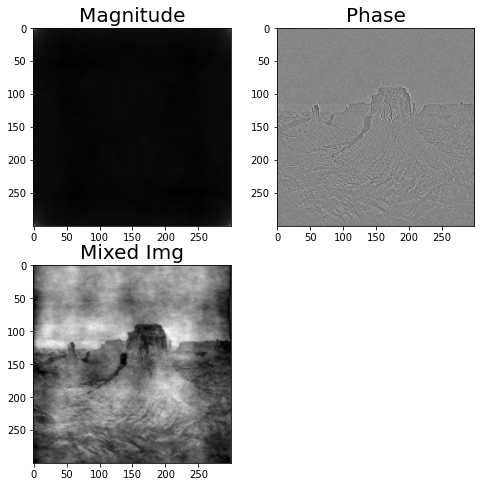

In [40]:
Processing.plot_mixed_imgs(img_1.fftmag,img_2.fftangle)

In [42]:
dimenions = {"height": 50,
"width": 50,
"x": 0,
"y": 50}

In [47]:
cropped_angle = Processing.crop_2d_img(img_1.fftangle,**dimenions)

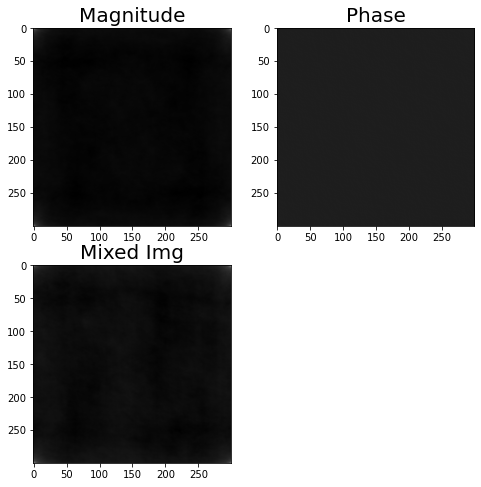

In [48]:
Processing.plot_mixed_imgs(img_1.fftmag,cropped_angle)